In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%ls ~/.kaggle/competitions/digit-recognizer/

sample_submission.csv  test.csv  train.csv


In [3]:
train = pd.read_csv('~/.kaggle/competitions/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('~/.kaggle/competitions/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


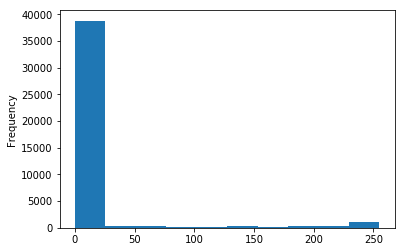

In [5]:
train.pixel100.plot(kind='hist')

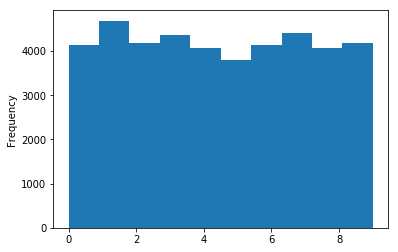

In [50]:
train.label.plot(kind='hist')

In [13]:
cols = test.columns.tolist()
len(cols)

784

In [53]:
X_train = train[cols].values / 255
y_train = train['label'].values[:, np.newaxis]
X_test = test[cols].values

In [54]:
X_train.shape, y_train.shape

((42000, 784), (42000, 1))

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=768)

In [57]:
y_train.shape, y_val.shape

((37800, 1), (4200, 1))

In [61]:
np.bincount(y_train[:, 0]), np.bincount(y_val[:, 0])

(array([3724, 4210, 3743, 3917, 3657, 3410, 3729, 3938, 3698, 3774]),
 array([408, 474, 434, 434, 415, 385, 408, 463, 365, 414]))

# Keras DNN

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

In [62]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_train.shape, y_val.shape

((37800, 10), (4200, 10))

In [42]:
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [71]:
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 1s 14us/step - loss: 0.4207 - acc: 0.8821 - val_loss: 0.2078 - val_acc: 0.9393
Epoch 2/20
37800/37800 [==============================] - 0s 12us/step - loss: 0.1689 - acc: 0.9508 - val_loss: 0.1557 - val_acc: 0.9526
Epoch 3/20
37800/37800 [==============================] - 0s 12us/step - loss: 0.1182 - acc: 0.9647 - val_loss: 0.1174 - val_acc: 0.9621
Epoch 4/20
37800/37800 [==============================] - 0s 12us/step - loss: 0.0907 - acc: 0.9731 - val_loss: 0.0981 - val_acc: 0.9693
Epoch 5/20
37800/37800 [==============================] - 0s 12us/step - loss: 0.0698 - acc: 0.9789 - val_loss: 0.0957 - val_acc: 0.9702
Epoch 6/20
37800/37800 [==============================] - 0s 12us/step - loss: 0.0558 - acc: 0.9831 - val_loss: 0.0870 - val_acc: 0.9707
Epoch 7/20
37800/37800 [==============================] - 0s 12us/step - loss: 0.0439 - acc: 0.9871 - val_loss: 0.0894 - val_acc:

In [74]:
y_pred = model.predict(X_test)

In [79]:
y_pred = np.argmax(y_pred, axis=1)

In [88]:
df_submit = pd.DataFrame(y_pred, columns=['Label'])
df_submit.index += 1
df_submit.index.name = 'ImageId'
df_submit.to_csv('~/projects/kaggle/digit_recognizer/submit.csv', index=True)